In [1]:
import cv2
import numpy as np
import os
from utils import load_config,process_image,write_image

In [2]:
config = load_config('./config.yaml')

<Figure size 5000x1000 with 0 Axes>

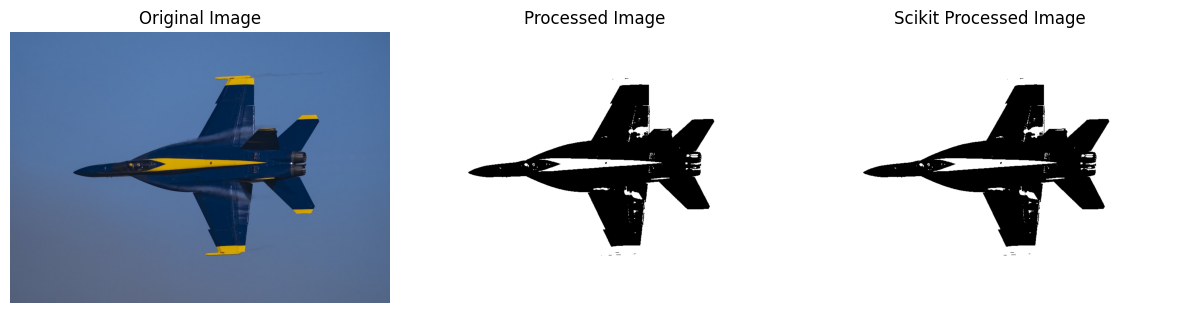

<Figure size 5000x1000 with 0 Axes>

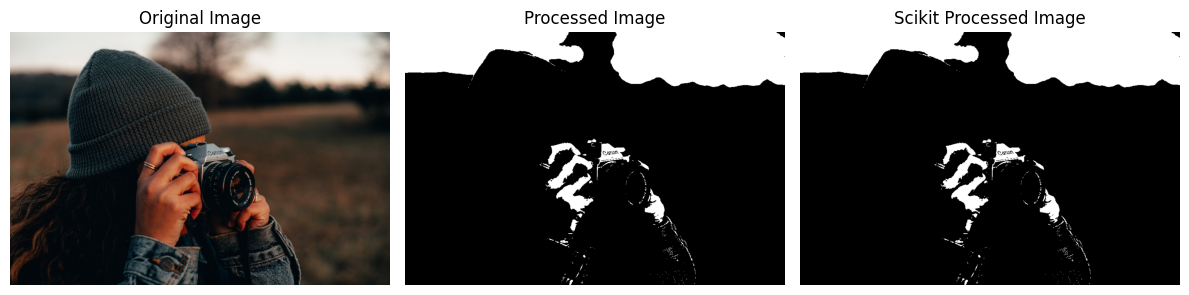

<Figure size 5000x1000 with 0 Axes>

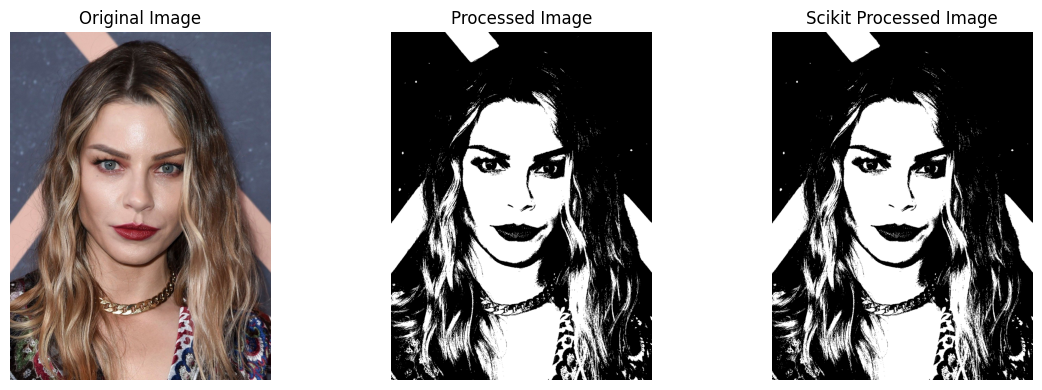

<Figure size 5000x1000 with 0 Axes>

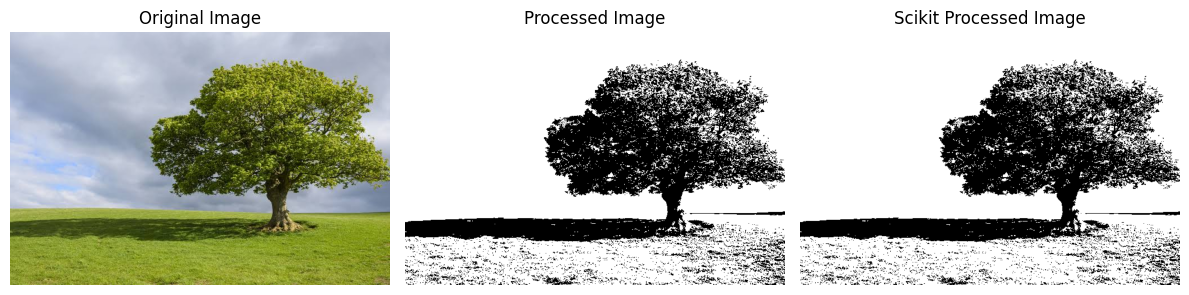

<Figure size 5000x1000 with 0 Axes>

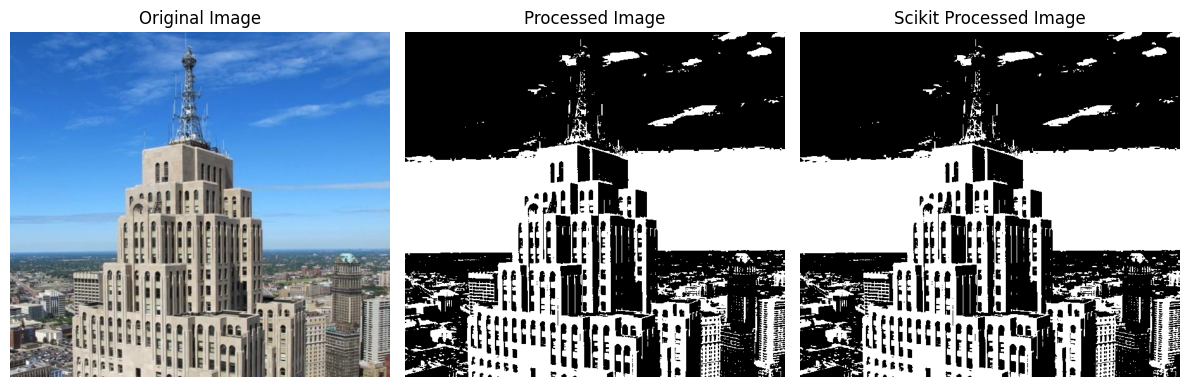

<Figure size 5000x1000 with 0 Axes>

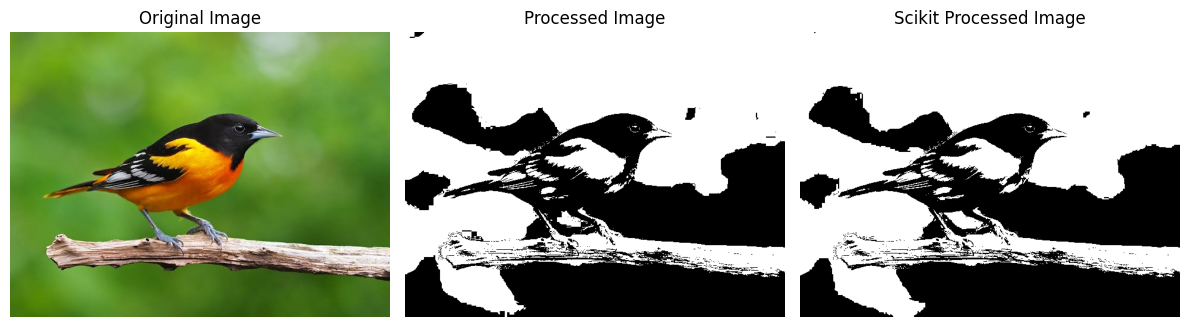

In [3]:


from matplotlib import pyplot as plt


input_folder = config['os']['input_folder']  
output_folder = config['os']['output_folder']
output_folder_auto = config['os']['output_folder_auto']

os.makedirs(output_folder, exist_ok=True)
os.makedirs(output_folder_auto, exist_ok=True)
for filename in os.listdir(input_folder):
    if filename.endswith(tuple(config['image']['extensions'])):  
        image = cv2.imread(os.path.join(input_folder, filename))
        if image is not None:
            
            
            segmented_image_manual = process_image(image,filename,mode="manual",plot=config['display']['save_histogram'])
            write_image(image = segmented_image_manual, filename = os.path.splitext(filename)[0], output_folder = output_folder)
            
            segmented_image_auto = process_image(image,filename,mode="auto",plot=config['display']['save_histogram'])
            write_image(image = segmented_image_auto, filename = os.path.splitext(filename)[0], output_folder = output_folder_auto)
            # Display images side by side
            images = [image, segmented_image_manual, segmented_image_auto]

            plt.clf()
            plot_titles = ["Original Image", "Processed Image", "Scikit Processed Image"]
            fig, axes = plt.subplots(1, 3, figsize=(12, 4))
            for i, ax in enumerate(axes):
                ax.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
                ax.set_title(plot_titles[i])
                ax.axis('off')
            
            
            plt.tight_layout()
            plt.show()

            
